In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats
import seaborn  as sns
from sklearn.metrics import classification_report,accuracy_score
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.svm import OneClassSVM


In [0]:
#Our aim is to predict whether the subject has depression or not 
mental_health = pd.read_csv('potentialprojectfile_on_mentalHealth.csv')

In [68]:
mental_health.shape

(334, 31)

In [69]:
mental_health.columns

Index(['I am currently employed at least part-time',
       'I identify as having a mental illness', 'Education',
       'I have my own computer separate from a smart phone',
       'I have been hospitalized before for my mental illness',
       'How many days were you hospitalized for your mental illness',
       'I am legally disabled', 'I have my regular access to the internet',
       'I live with my parents', 'I have a gap in my resume',
       'Total length of any gaps in my resume in months.',
       'Annual income (including any social welfare programs) in USD',
       'I am unemployed', 'I read outside of work and school',
       'Annual income from social welfare programs', 'I receive food stamps',
       'I am on section 8 housing',
       'How many times were you hospitalized for your mental illness',
       'Lack of concentration', 'Anxiety', 'Depression', 'Obsessive thinking',
       'Mood swings', 'Panic attacks', 'Compulsive behavior', 'Tiredness',
       'Age', 'Gender

In [70]:
#droping extra/unwanted columns
mental_health.drop(['I am unemployed','Annual income from social welfare programs'], axis=1,inplace = True)
mental_health.shape

(334, 29)

In [0]:
mental_health.rename(columns={"I am currently employed at least part-time": "Employed", "I identify as having a mental illness": "Mental patient", "I have my own computer separate from a smart phone": "Owns a PC"},inplace = True)

In [0]:
mental_health.rename(columns = {"I have been hospitalized before for my mental illness":"admited for mental illness","How many days were you hospitalized for your mental illness":"No of days hospitalized","I am legally disabled":"legally disabled","I have my regular access to the internet":"internet access","I live with my parents":"iving with parents","I have a gap in my resume":"gap in resume","Annual income (including any social welfare programs) in USD":"annual income","I read outside of work and school":"reads","I receive food stamps":"Food stamps","I am on section 8 housing":"under section 8","How many times were you hospitalized for your mental illness":"No of times hospitalized"},inplace = True)

In [73]:
mental_health.describe()

,Employed,Mental patient,Owns a PC,admited for mental illness,No of days hospitalized,legally disabled,internet access,iving with parents,gap in resume,Total length of any gaps in my resume in months.,annual income,reads,Food stamps,under section 8,No of times hospitalized,Lack of concentration,Anxiety,Depression,Obsessive thinking,Mood swings,Panic attacks,Compulsive behavior,Tiredness
count,334.000000,334.000000,334.000000,334.000000,297.000000,334.000000,334.000000,334.000000,334.000000,334.000000,334.000000,334.000000,334.000000,334.000000,334.000000,333.000000,334.000000,334.000000,333.000000,333.000000,333.000000,333.000000,333.000000
mean,0.679641,0.239521,0.874251,0.077844,3.276094,0.098802,0.964072,0.110778,0.245509,8.497006,37.425150,0.889222,0.065868,0.020958,1.194611,0.153153,0.299401,0.257485,0.126126,0.114114,0.147147,0.087087,0.300300
std,0.467315,0.427431,0.332063,0.268328,14.126045,0.298844,0.186390,0.314328,0.431034,20.722643,30.651564,0.314328,0.248424,0.143459,8.115227,0.360677,0.458683,0.437905,0.332491,0.318428,0.354786,0.282387,0.459078
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,12.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,30.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,4.750000,55.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,100.000000,1.000000,1.000000,1.000000,1.000000,100.000000,100.000000,1.000000,1.000000,1.000000,100.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


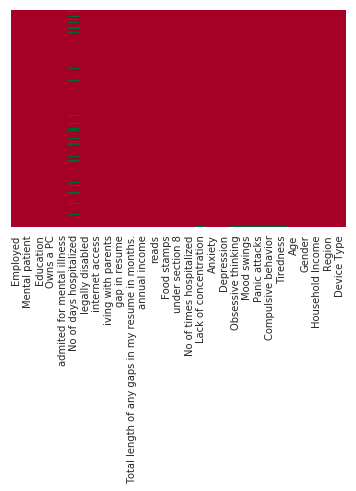

In [75]:
sns.heatmap(mental_health.isnull(),yticklabels = False, cbar = False , cmap ='RdYlGn')


In [76]:
mental_health.isnull().sum()/len(mental_health)

Employed                                            0.000000
Mental patient                                      0.000000
Education                                           0.000000
Owns a PC                                           0.000000
admited for mental illness                          0.000000
No of days hospitalized                             0.110778
legally disabled                                    0.000000
internet access                                     0.000000
iving with parents                                  0.000000
gap in resume                                       0.000000
Total length of any gaps in my resume in months.    0.000000
annual income                                       0.000000
reads                                               0.000000
Food stamps                                         0.000000
under section 8                                     0.000000
No of times hospitalized                            0.000000
Lack of concentration   

In [0]:
days_mean =mental_health['No of days hospitalized'].mean()
mental_health['No of days hospitalized'].fillna(days_mean,inplace=True)



In [78]:
mental_health.tail()

,Employed,Mental patient,Education,Owns a PC,admited for mental illness,No of days hospitalized,legally disabled,internet access,iving with parents,gap in resume,Total length of any gaps in my resume in months.,annual income,reads,Food stamps,under section 8,No of times hospitalized,Lack of concentration,Anxiety,Depression,Obsessive thinking,Mood swings,Panic attacks,Compulsive behavior,Tiredness,Age,Gender,Household Income,Region,Device Type
329,0,0,High School or GED,1,0,3.276094,1,1,0,0,0,0,1,0,0,0,0.0,0,0,0.0,0.0,0.0,0.0,1.0,45-60,Female,Prefer not to answer,Mountain,Android Phone / Tablet
330,1,0,Some Undergraduate,1,0,0.000000,0,1,1,0,0,62,1,0,0,0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,18-29,Male,"$50,000-$74,999",Pacific,Windows Desktop / Laptop
331,1,0,Some Undergraduate,1,0,0.000000,0,1,0,0,0,0,1,1,0,1,0.0,0,0,0.0,0.0,0.0,0.0,0.0,> 60,Female,"$10,000-$24,999",West North Central,Windows Desktop / Laptop
332,0,1,Some Undergraduate,0,1,1.000000,1,1,1,1,30,12,1,1,0,3,1.0,1,1,1.0,1.0,1.0,1.0,1.0,18-29,Female,"$0-$9,999",West South Central,Android Phone / Tablet
333,1,1,Some Undergraduate,1,0,0.000000,1,1,0,0,0,25,1,0,0,0,NaN,1,1,NaN,NaN,NaN,NaN,NaN,18-29,Female,"$10,000-$24,999",Pacific,Android Phone / Tablet


In [0]:
mental_health[mental_health.isnull().any(axis=1)]
mental_health.drop([77,203,333],inplace = True)


In [80]:
mental_health.dtypes

Employed                                              int64
Mental patient                                        int64
Education                                            object
Owns a PC                                             int64
admited for mental illness                            int64
No of days hospitalized                             float64
legally disabled                                      int64
internet access                                       int64
iving with parents                                    int64
gap in resume                                         int64
Total length of any gaps in my resume in months.      int64
annual income                                         int64
reads                                                 int64
Food stamps                                           int64
under section 8                                       int64
No of times hospitalized                              int64
Lack of concentration                   

In [0]:
mental_health['No of days hospitalized'] =mental_health['No of days hospitalized'].astype(int)
mental_health['Lack of concentration'] =mental_health['Lack of concentration'].astype(int)
mental_health['Obsessive thinking'] =mental_health['Obsessive thinking'].astype(int)
mental_health['Mood swings'] =mental_health['Mood swings'].astype(int)
mental_health['Panic attacks'] =mental_health['Panic attacks'].astype(int)
mental_health['Compulsive behavior'] =mental_health['Compulsive behavior'].astype(int)
mental_health['Tiredness'] =mental_health['Tiredness'].astype(int)


In [82]:
mental_health.isnull().sum()

Employed                                            0
Mental patient                                      0
Education                                           0
Owns a PC                                           0
admited for mental illness                          0
No of days hospitalized                             0
legally disabled                                    0
internet access                                     0
iving with parents                                  0
gap in resume                                       0
Total length of any gaps in my resume in months.    0
annual income                                       0
reads                                               0
Food stamps                                         0
under section 8                                     0
No of times hospitalized                            0
Lack of concentration                               0
Anxiety                                             0
Depression                  

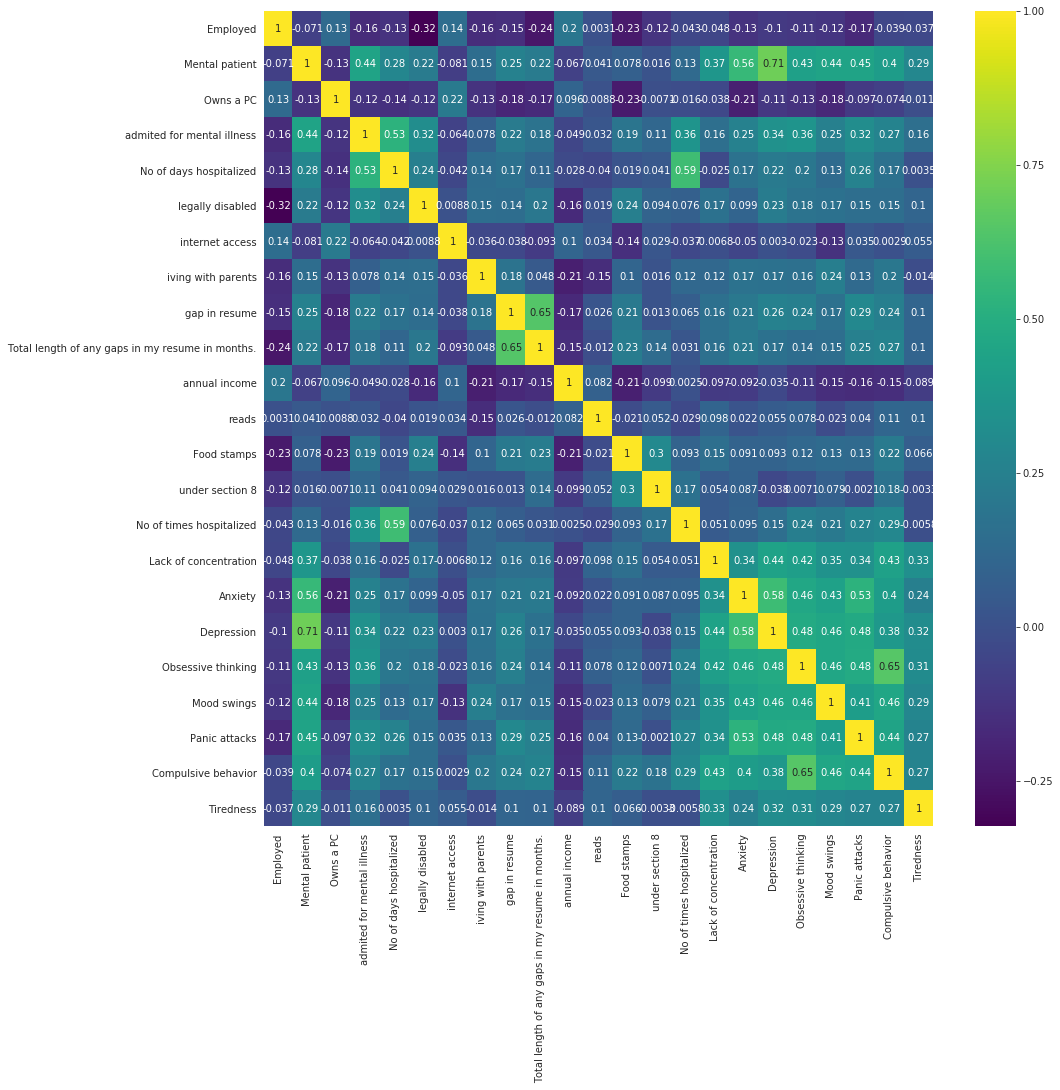

In [83]:
#getting correlation among features
corrmat = mental_health.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(15,15))
#plot heat map
g=sns.heatmap(mental_health[top_corr_features].corr(),annot=True,cmap="viridis")

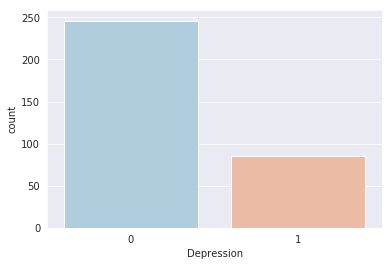

In [84]:
#checking whether the dataset is balanced or not.For this problem we are keeping Depression as our target variable as we want to classify basedon depression
sns.set_style('darkgrid')
sns.countplot(x='Depression',data=mental_health,palette='RdBu_r')

In [87]:
#this is an example of an imbalanced dataset.

Depressed = mental_health[mental_health['Depression'] == 1]
Not_depressed = mental_health[mental_health['Depression'] == 0]
print(Depressed.shape,Not_depressed.shape)

(85, 29) (246, 29)


In [0]:
#we will use the library imblearn for carrying out the required techniques of upsampling and downsampling to handle this dataset
from imblearn.under_sampling import NearMiss

In [0]:
#defining the independent and dependent variables
X = mental_health.drop(['Depression'], axis = 1)
y = mental_health['Depression']

In [94]:
nm = NearMiss(random_state = 40)
X_res,y_res = nm.fit(X,y)


ValueError: ignored

In [0]:
# aplyala he onehot encoding karava lagnarrrr

#sampling chi link  -   https://www.youtube.com/watch?v=YMPMZmlH5Bo
#https://github.com/krishnaik06/Predicting-Heart-Disease/blob/master/Heart%20Disease%20Predictions.ipynb   - he dusri link